In [1]:
from nltk.tokenize import word_tokenize
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#opening and reading the file
with open(r'C:\intro to web sci\unzipped\Text_3.txt','r',encoding='utf_8',errors='ignore') as fdata:
    text_3=fdata.read().lower()
    text_3= text_3.replace(" ’ ","")
    text_3= text_3.replace("’","")

In [3]:
#tokenizing the text file
import nltk
tokens= []
alltokens = nltk.word_tokenize(text_3)
for i in alltokens:
        if i.isalpha():
            tokens.append(i)

In [5]:
#sorting and finding frequency of words
import pandas as pd
word_freq = defaultdict(int)

for text in tokens:
    for word in text.split():
        word_freq[word] += 1

pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'Frequency of words'})


,Frequency of words
the,579
of,434
a,287
in,254
to,252
...,...
recurrences,1
stretched,1
degree,1
classification,1


In [6]:
from nltk.book import FreqDist
fdist = FreqDist(tokens)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [8]:
import matplotlib.pyplot as plt
df = pd.DataFrame(fdist.most_common(50),columns=['words', 'count'])

In [9]:
df

,words,count
0,the,579
1,of,434
2,a,287
3,in,254
4,to,252
5,is,242
6,that,215
7,and,208
8,for,134
9,frequency,129


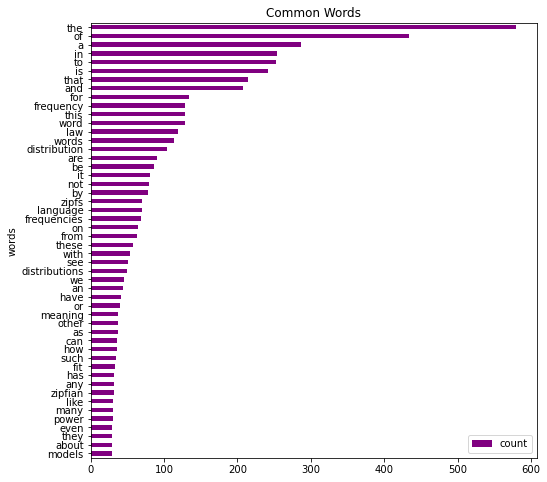

In [11]:
#vizualzing the frequencies
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words")
plt.show()

In [12]:
df=df.sort_values('count',ascending= False)
df['rank']= df.index+1
df

,words,count,rank
0,the,579,1
1,of,434,2
2,a,287,3
3,in,254,4
4,to,252,5
5,is,242,6
6,that,215,7
7,and,208,8
8,for,134,9
9,frequency,129,10


In [13]:
frequency = {}
for words in text_3 :
    count = frequency.get(word , 0)
    frequency[ words ] = count + 1

In [14]:
from operator import itemgetter
rank = 1
column_header = ['Rank', 'Frequency ', '                  K= Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

In [15]:
for words , freq in collection:
    df.loc[words] = [rank, freq, rank*freq]
    rank = rank + 1
    
print (df)

   Rank Frequency                    K= Frequency * Rank
a     1          1                                     1
b     2          1                                     2
s     3          1                                     3
t     4          1                                     4
r     5          1                                     5
..  ...        ...                                   ...
{    72          1                                    72
}    73          1                                    73
í    74          1                                    74
λ    75          1                                    75
á    76          1                                    76

[76 rows x 3 columns]


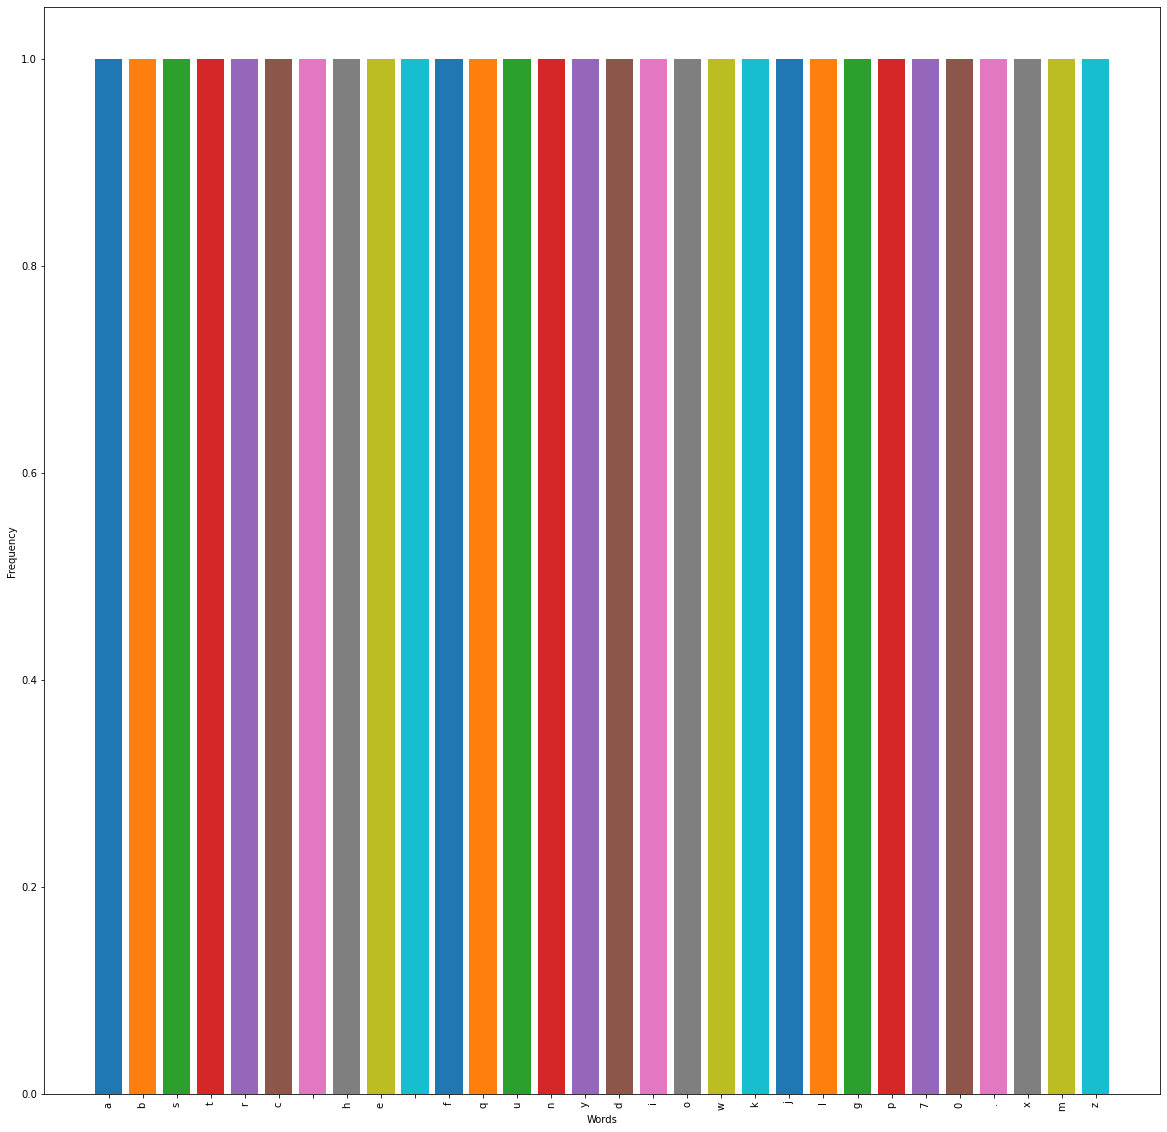

In [16]:
plt.figure(figsize=(20,20))  
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)   
for word , freq in collection[:30]:
    plt.bar(word, freq)    
plt.show()